In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [2]:
df = pd.read_csv("dataset.csv", delimiter=";")
df_train = df[~df.default.isnull()].copy()
df_test = df[df.default.isnull()].copy()
df_test.pop("default")
print(df_train.shape, df_test.shape)

(89976, 43) (10000, 42)


In [3]:
df_train.describe()

,default,account_amount_added_12_24m,account_days_in_dc_12_24m,account_days_in_rem_12_24m,account_days_in_term_12_24m,account_incoming_debt_vs_paid_0_24m,account_status,account_worst_status_0_3m,account_worst_status_12_24m,account_worst_status_3_6m,...,status_3rd_last_archived_0_24m,status_max_archived_0_6_months,status_max_archived_0_12_months,status_max_archived_0_24_months,recovery_debt,sum_capital_paid_account_0_12m,sum_capital_paid_account_12_24m,sum_paid_inv_0_12m,time_hours,worst_status_active_inv
count,89976.000000,8.997600e+04,79293.000000,79293.000000,79293.000000,36619.000000,41042.000000,41042.000000,29921.000000,38038.000000,...,89976.000000,89976.000000,89976.000000,89976.000000,89976.000000,89976.000000,89976.000000,8.997600e+04,89976.000000,27436.000000
mean,0.014315,1.227615e+04,0.217333,5.073840,0.287894,1.330536,1.041665,1.173286,1.339227,1.185446,...,0.744499,0.800258,1.051547,1.225782,4.044401,10833.659832,6579.854317,3.921349e+04,15.336351,1.122503
std,0.118786,3.546356e+04,5.629972,22.957817,2.930697,26.924730,0.201766,0.420694,0.575655,0.442856,...,0.634204,0.719561,0.785793,0.833651,167.324157,26494.078628,19192.785345,8.940011e+04,5.030674,0.344673
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000278,1.000000
25%,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.630000e+03,11.629167,1.000000
50%,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.153818,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.600000e+04,15.800833,1.000000
75%,0.000000,4.984250e+03,0.000000,0.000000,0.000000,0.664694,1.000000,1.000000,2.000000,1.000000,...,1.000000,1.000000,1.000000,2.000000,0.000000,9098.250000,100.000000,4.389925e+04,19.548056,1.000000
max,1.000000,1.128775e+06,362.000000,365.000000,97.000000,3914.000000,4.000000,4.000000,4.000000,4.000000,...,5.000000,3.000000,5.000000,5.000000,36479.000000,571475.000000,341859.000000,2.962870e+06,23.999722,3.000000


In [4]:
numerical_features = [
    "account_amount_added_12_24m",
    "account_days_in_dc_12_24m",
    "account_days_in_rem_12_24m",
    "account_days_in_term_12_24m",
    "account_incoming_debt_vs_paid_0_24m",
    "age",
    "avg_payment_span_0_12m",
    "avg_payment_span_0_3m",
    "max_paid_inv_0_12m",
    "max_paid_inv_0_24m",
    "num_active_div_by_paid_inv_0_12m",
    "num_active_inv",
    "num_arch_dc_0_12m",
    "num_arch_dc_12_24m",
    "num_arch_ok_0_12m",
    "num_arch_ok_12_24m",
    "num_arch_rem_0_12m",
    "num_arch_written_off_0_12m",
    "num_arch_written_off_12_24m",
    "num_unpaid_bills",
    "recovery_debt",
    "sum_capital_paid_account_0_12m",
    "sum_capital_paid_account_12_24m",
    "sum_paid_inv_0_12m",
    "time_hours",
]

categorical_features = [
    "account_status",
    "account_worst_status_0_3m",
    "account_worst_status_12_24m",
    "account_worst_status_3_6m",
    "account_worst_status_6_12m",
    "merchant_category",
    "merchant_group",
    "has_paid",
    "name_in_email",
    "status_last_archived_0_24m",
    "status_2nd_last_archived_0_24m",
    "status_3rd_last_archived_0_24m",
    "status_max_archived_0_6_months",
    "status_max_archived_0_12_months",
    "status_max_archived_0_24_months",
    "worst_status_active_inv",
]

for c in df_train.columns:
    print(c)

uuid
default
account_amount_added_12_24m
account_days_in_dc_12_24m
account_days_in_rem_12_24m
account_days_in_term_12_24m
account_incoming_debt_vs_paid_0_24m
account_status
account_worst_status_0_3m
account_worst_status_12_24m
account_worst_status_3_6m
account_worst_status_6_12m
age
avg_payment_span_0_12m
avg_payment_span_0_3m
merchant_category
merchant_group
has_paid
max_paid_inv_0_12m
max_paid_inv_0_24m
name_in_email
num_active_div_by_paid_inv_0_12m
num_active_inv
num_arch_dc_0_12m
num_arch_dc_12_24m
num_arch_ok_0_12m
num_arch_ok_12_24m
num_arch_rem_0_12m
num_arch_written_off_0_12m
num_arch_written_off_12_24m
num_unpaid_bills
status_last_archived_0_24m
status_2nd_last_archived_0_24m
status_3rd_last_archived_0_24m
status_max_archived_0_6_months
status_max_archived_0_12_months
status_max_archived_0_24_months
recovery_debt
sum_capital_paid_account_0_12m
sum_capital_paid_account_12_24m
sum_paid_inv_0_12m
time_hours
worst_status_active_inv


<Figure size 576x396 with 0 Axes>

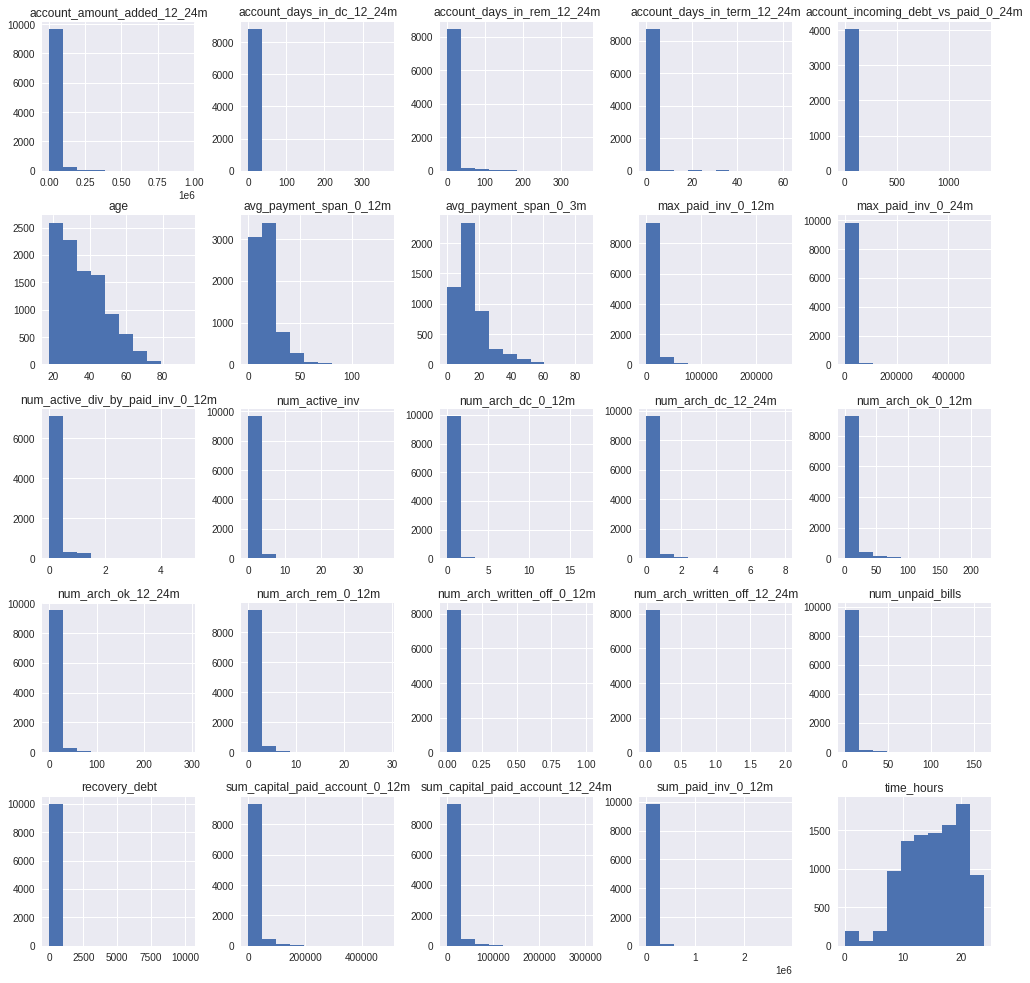

In [5]:
plt.figure()
df_test[numerical_features].hist(figsize=(17, 17))
plt.show()

<Figure size 576x396 with 0 Axes>

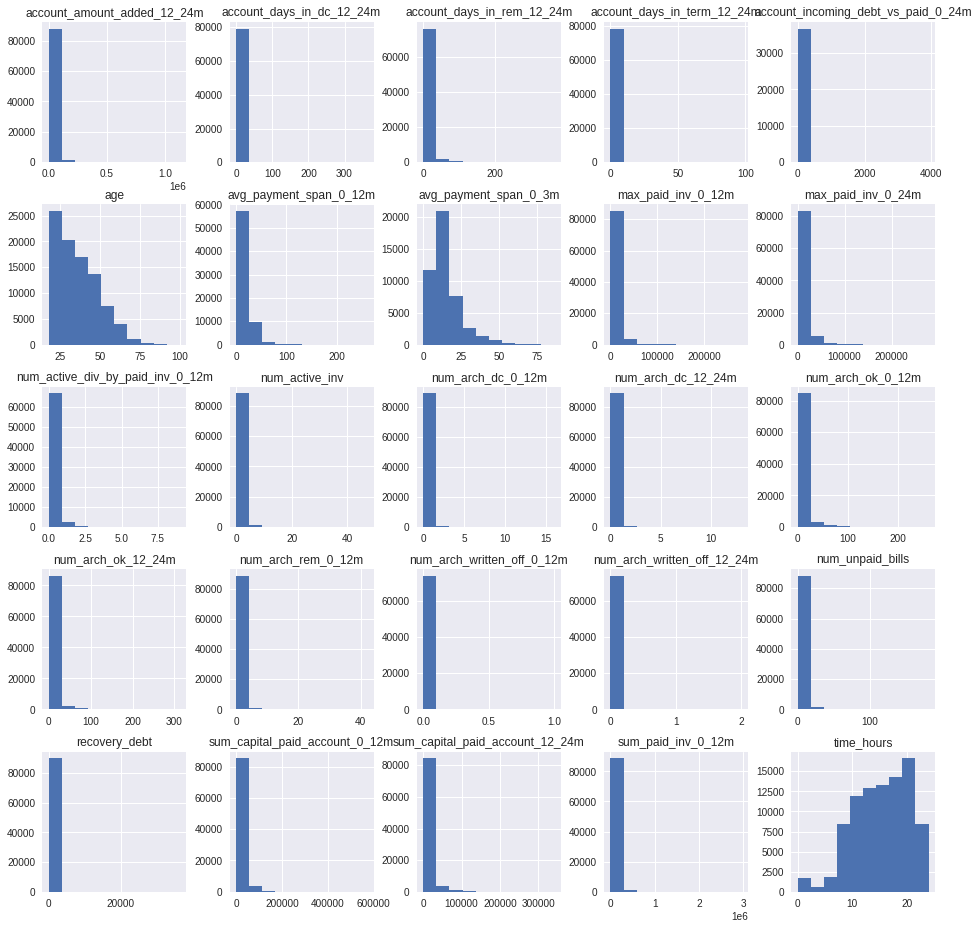

In [6]:
plt.figure()
df_train[numerical_features].hist(figsize=(16, 16))
plt.show()

In [7]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum() / df_train.isnull().count() * 100).sort_values(ascending = False)
df_percent_nans = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
df_percent_nans.head(20)

,Total,Percent
worst_status_active_inv,62540,69.507424
account_worst_status_12_24m,60055,66.745577
account_worst_status_6_12m,54313,60.363875
account_incoming_debt_vs_paid_0_24m,53357,59.301369
account_worst_status_3_6m,51938,57.724282
account_status,48934,54.385614
account_worst_status_0_3m,48934,54.385614
avg_payment_span_0_3m,44382,49.326487
avg_payment_span_0_12m,21468,23.859696
num_active_div_by_paid_inv_0_12m,20658,22.959456


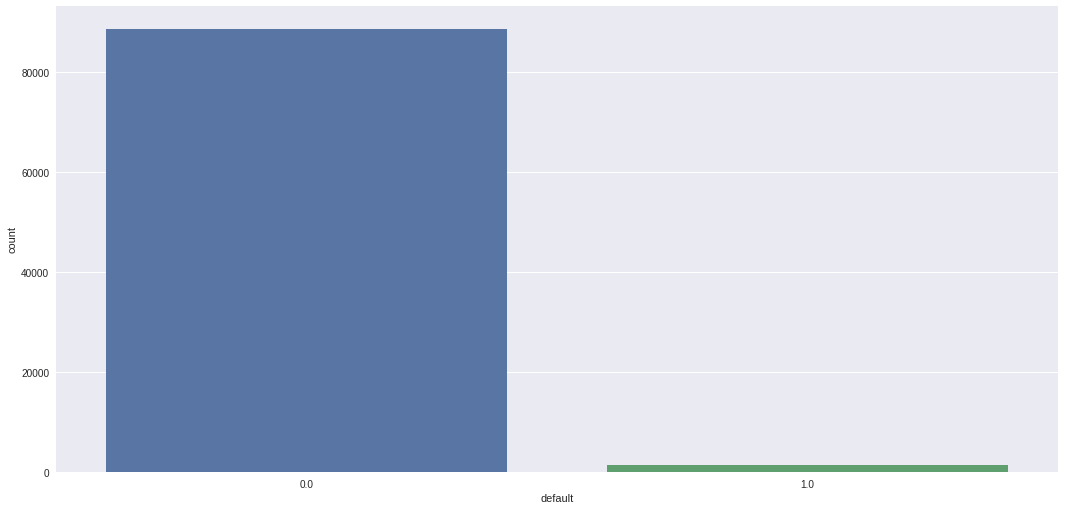

In [8]:
ax = sns.catplot(x="default", data=df_train, kind="count", height=7, aspect=2.1)

In [9]:
df_train.default.value_counts()

0.0    88688
1.0     1288
Name: default, dtype: int64

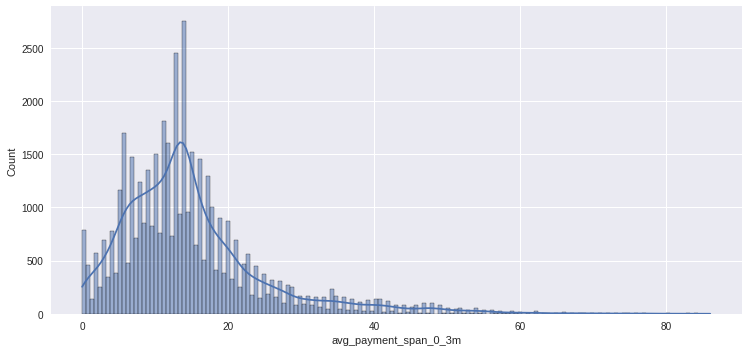

In [9]:
ax = sns.displot(data=df_train, x="avg_payment_span_0_3m", kde=True, height=5, aspect=2.1)

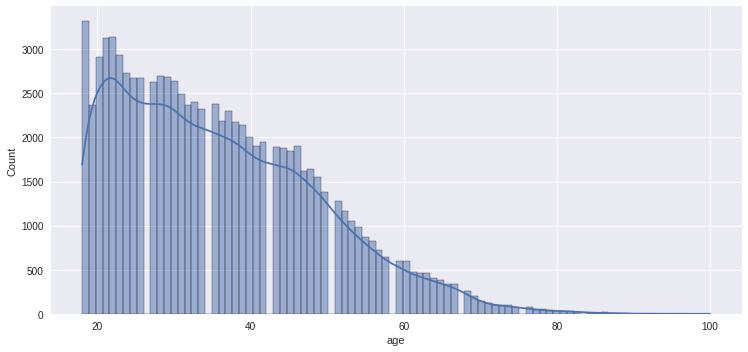

In [10]:
ax = sns.displot(data=df_train, x="age", kde=True, height=5, aspect=2.1)

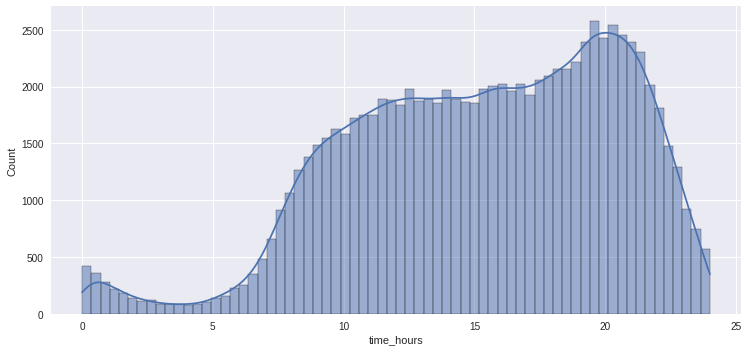

In [11]:
ax = sns.displot(data=df_train, x="time_hours", kde=True, height=5, aspect=2.1)

In [12]:
categorical_features

['account_status',
 'account_worst_status_0_3m',
 'account_worst_status_12_24m',
 'account_worst_status_3_6m',
 'account_worst_status_6_12m',
 'merchant_category',
 'merchant_group',
 'has_paid',
 'name_in_email',
 'status_last_archived_0_24m',
 'status_2nd_last_archived_0_24m',
 'status_3rd_last_archived_0_24m',
 'status_max_archived_0_6_months',
 'status_max_archived_0_12_months',
 'status_max_archived_0_24_months',
 'worst_status_active_inv']

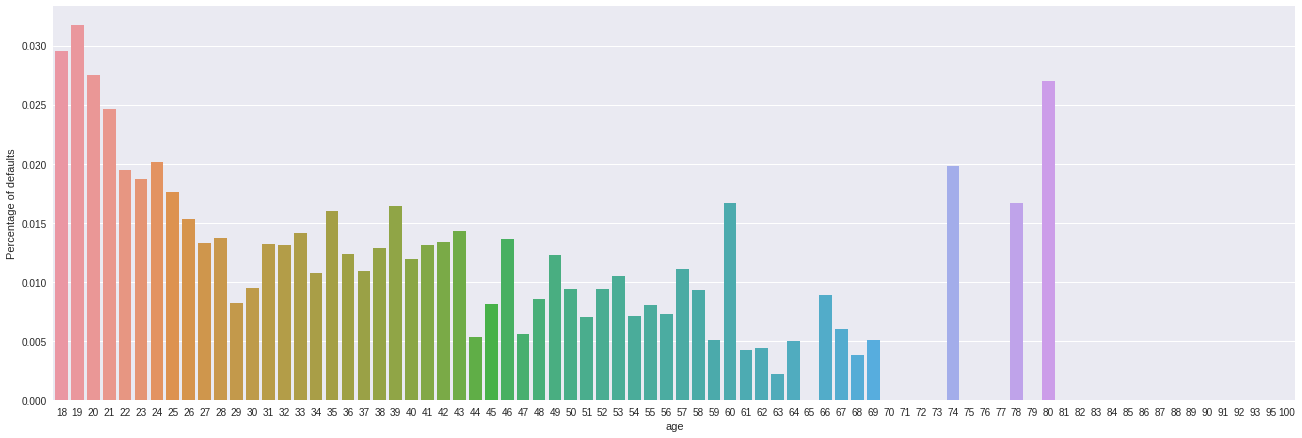

In [13]:
has_defaulted = df_train.copy().groupby("age").default.sum().to_frame()
has_defaulted["size"] = df_train.copy().groupby("age").default.size()
has_defaulted["percantage"] = has_defaulted["default"] / has_defaulted["size"]

chart = sns.catplot(
    data=has_defaulted.reset_index(),
    x="age", 
    y="percantage",
    kind="bar",
    height=6,
    aspect=3
)

chart.set_ylabels("Percentage of defaults")

Text(0.5, 0.98, 'account_worst_status')

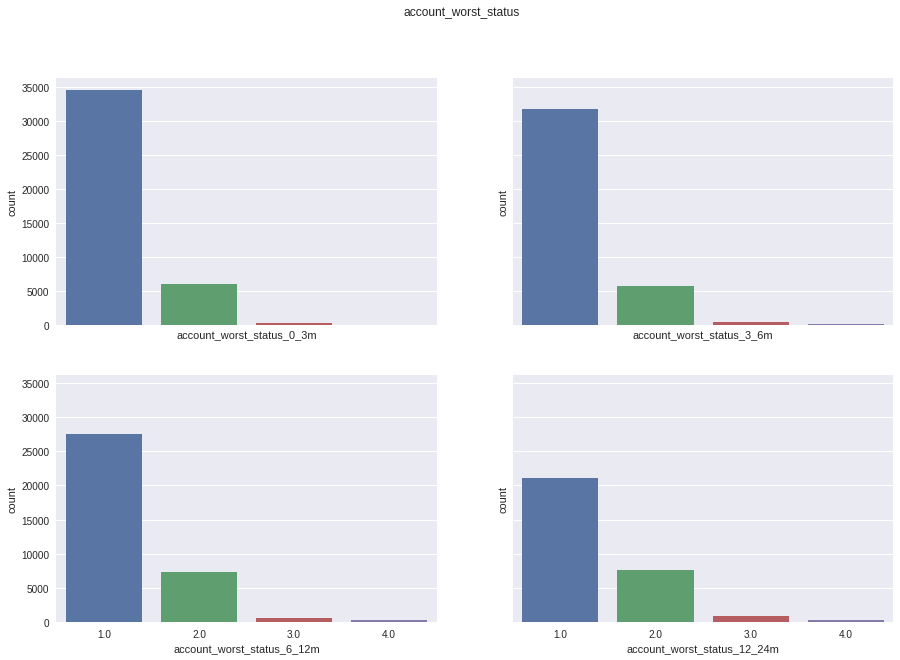

In [14]:
fig, ax = plt.subplots(2,2, figsize=(15, 10), sharex=True, sharey=True)

cols = ["account_worst_status_0_3m", "account_worst_status_3_6m", "account_worst_status_6_12m", "account_worst_status_12_24m"]
k = 0
for j in range(len(ax)):
    for i in range(len(ax[j])):
        ax[j][i] = sns.countplot(x=cols[k], data=df_train, ax=ax[j][i])
        k = k + 1
        
fig.suptitle('account_worst_status')

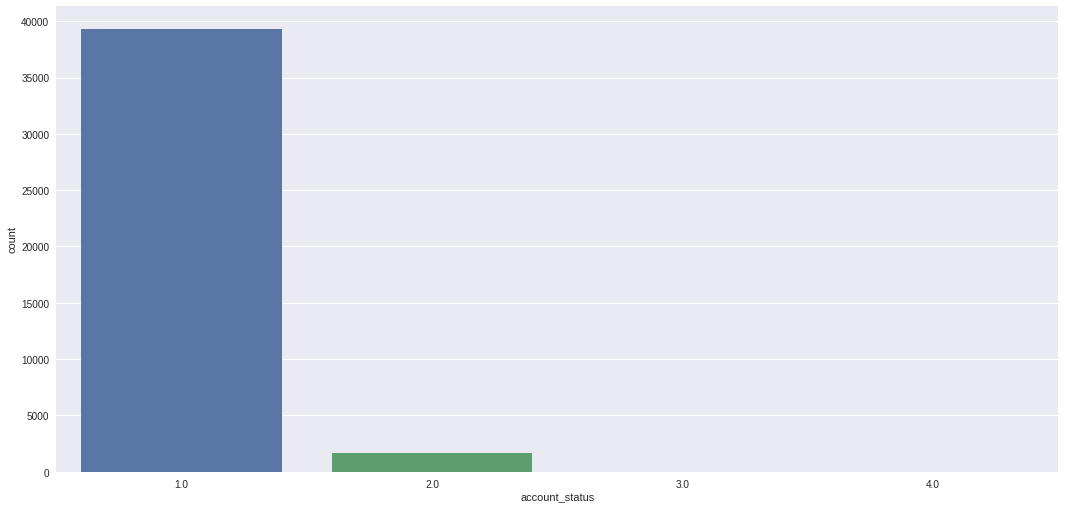

In [15]:
ax = sns.catplot(x="account_status", data=df_train, kind="count", height=7, aspect=2.1)

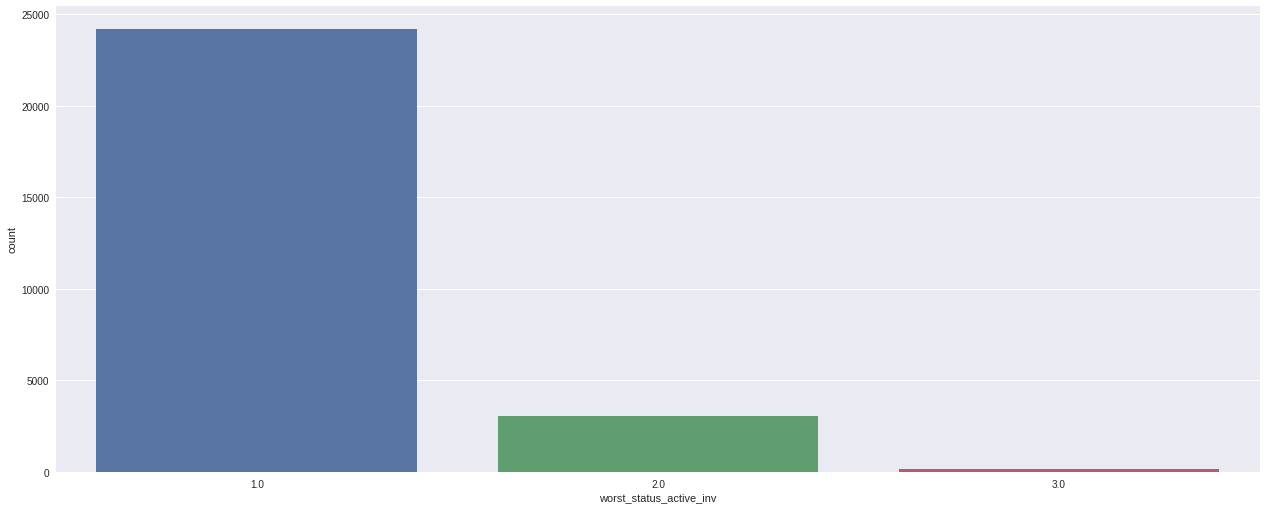

In [16]:
ax = sns.catplot(x="worst_status_active_inv", data=df_train, kind="count", height=7, aspect=2.5)

merchant_category
Diversified entertainment         34781
Youthful Shoes & Clothing         10524
Books & Magazines                  8447
General Shoes & Clothing           4162
Concept stores & Miscellaneous     3969
dtype: int64


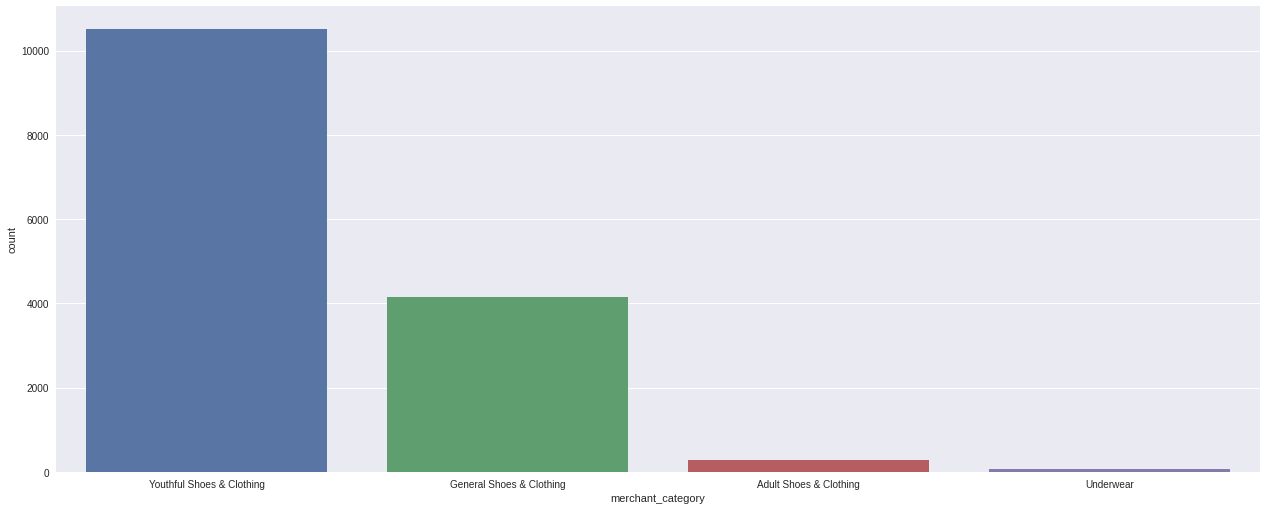

In [17]:
# ['account_status',
#  'account_worst_status_0_3m',
#  'account_worst_status_12_24m',
#  'account_worst_status_3_6m',
#  'account_worst_status_6_12m',
#  'merchant_category',
#  'merchant_group',
#  'has_paid',
#  'name_in_email',
#  'status_last_archived_0_24m',
#  'status_2nd_last_archived_0_24m',
#  'status_3rd_last_archived_0_24m',
#  'status_max_archived_0_6_months',
#  'status_max_archived_0_12_months',
#  'status_max_archived_0_24_months',
#  'worst_status_active_inv']

print(df_train.groupby("merchant_category").size().sort_values(ascending=False).head(5))

ax = sns.catplot(x="merchant_category", data=df_train.query("merchant_group == 'Clothing & Shoes'"), kind="count", height=7, aspect=2.5)

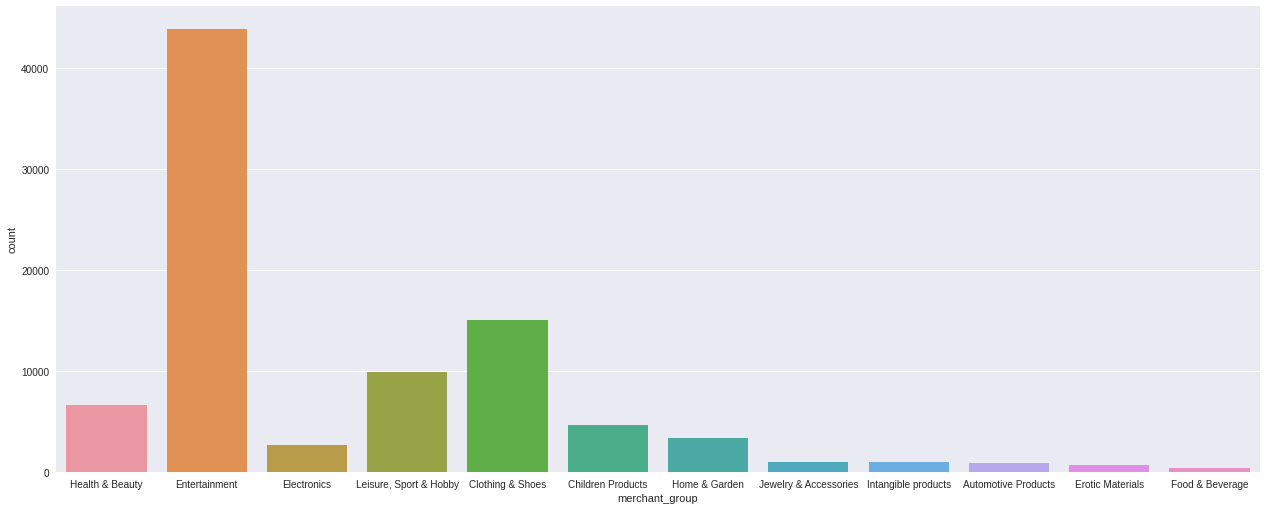

In [18]:
ax = sns.catplot(x="merchant_group", data=df_train, kind="count", height=7, aspect=2.5)

In [19]:
def bin_and_plot(column, y_axis_name, df=df_train): 
    has_defaulted = df.copy()
    has_defaulted[f"{column}_bin"], bins = pd.qcut(has_defaulted[column], q=10, labels=False, retbins=True, duplicates="drop")

    chart = sns.catplot(
        data=has_defaulted.groupby(f"{column}_bin")["default"].sum().rename(y_axis_name).reset_index(),
        x=f"{column}_bin", 
        y=y_axis_name,
        kind="bar",
        height=5,
        aspect=3
    )

In [20]:
df_train["name_in_email"].value_counts()

F+L         36358
no_match    15094
L1+F        14495
F            8755
Nick         7496
F1+L         6566
L            1188
Initials       24
Name: name_in_email, dtype: int64

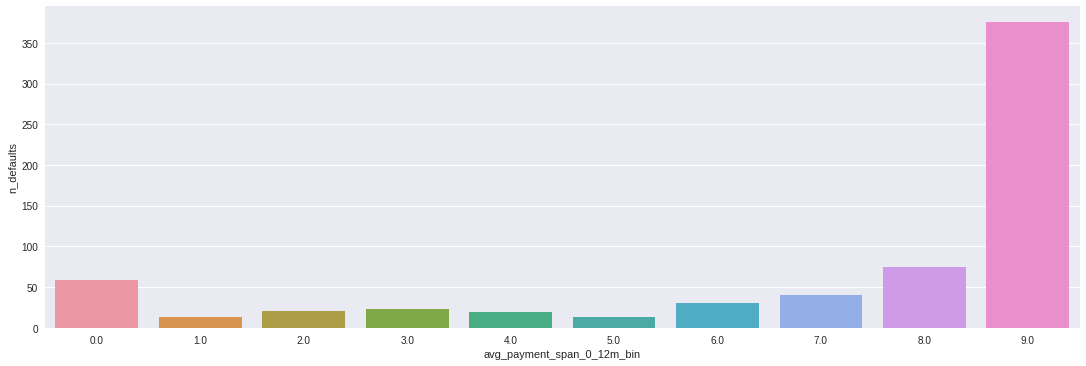

In [21]:
bin_and_plot("avg_payment_span_0_12m", "n_defaults")

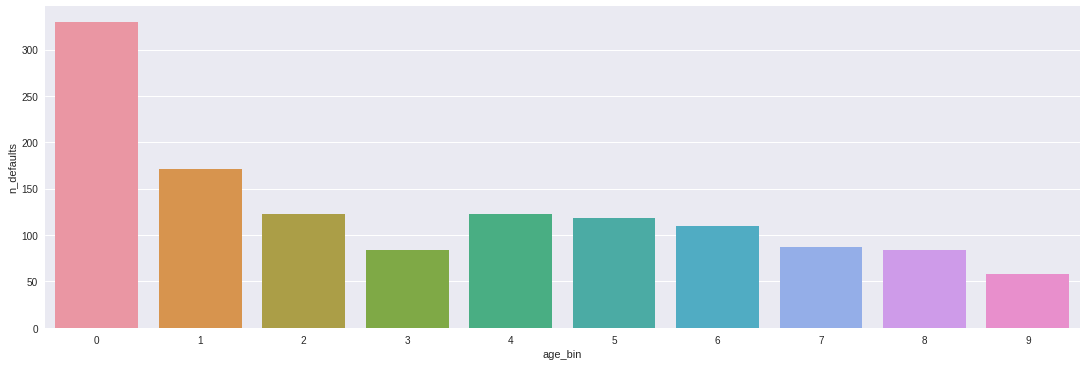

In [22]:
bin_and_plot("age", "n_defaults")

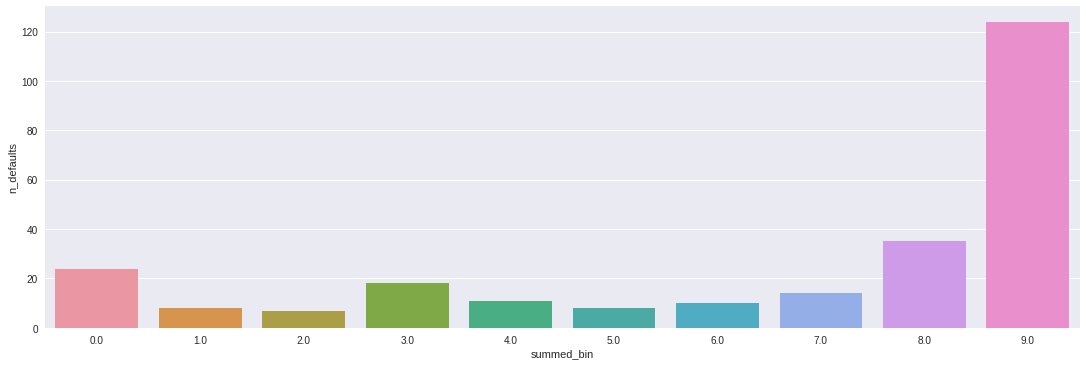

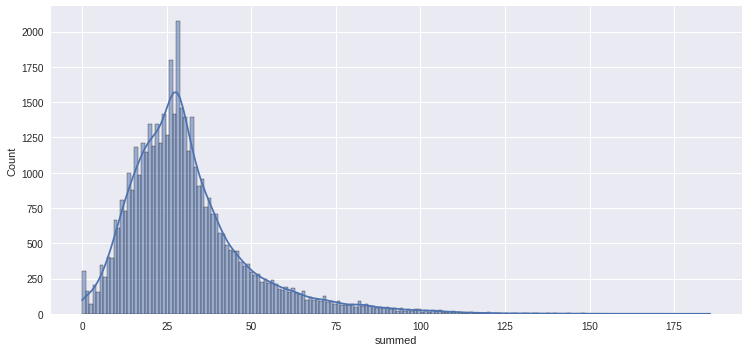

In [23]:
# account_amount_added_12_24m            0.005819
# account_days_in_dc_12_24m              0.065545
# account_days_in_rem_12_24m             0.085565
# account_days_in_term_12_24m            0.086796
# account_incoming_debt_vs_paid_0_24m    0.000627
# age                                    0.043728
# avg_payment_span_0_12m                 0.197384
# avg_payment_span_0_3m                  0.073332
# max_paid_inv_0_12m                     0.042296
# max_paid_inv_0_24m                     0.043468

tmp = df_train.copy()

tmp["summed"] = df_train["avg_payment_span_0_3m"] + df_train["avg_payment_span_0_12m"]

bin_and_plot("summed", "n_defaults", tmp)
ax = sns.displot(data=tmp, x="summed", kde=True, height=5, aspect=2.1)

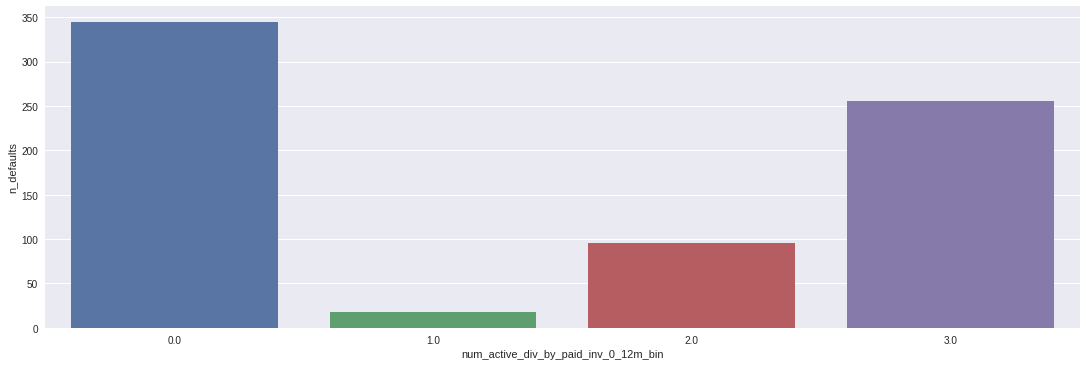

In [24]:
bin_and_plot("num_active_div_by_paid_inv_0_12m", "n_defaults")

In [ ]:
column = "num_active_div_by_paid_inv_0_12m"
y_axis_name = "n_defaults"
has_defaulted = df_train.copy()
has_defaulted[f"{column}_bin"], bins = pd.qcut(has_defaulted[column], q=10, labels=False, retbins=True, duplicates="drop")
chart = sns.catplot(
#     data=has_defaulted.groupby(["default", f"{column}_bin"]).count().reset_index(),
    
    data=has_defaulted[["default", f"{column}_bin"]].melt(
        id_vars=[f"{column}_bin"], var_name="default"
    ).groupby([f"{column}_bin", "default"]).sum().reset_index(),
    
    x=f"{column}_bin",
#     y=y_axis_name,
    hue="default",
    kind="bar",
    height=6,
    aspect=3
)
# bin_and_plot("num_active_div_by_paid_inv_0_12m", "n_defaults")

In [ ]:
has_defaulted[["default", f"{column}_bin"]].melt(
        id_vars=[f"{column}_bin"]
    ).groupby([f"{column}_bin", "value"]).sum().reset_index()

<AxesSubplot:>

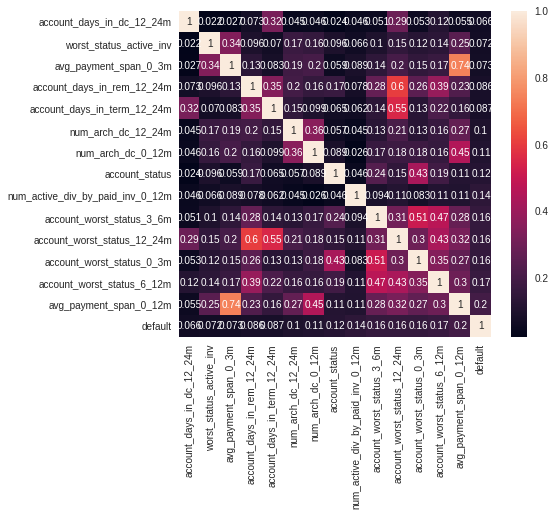

In [26]:
# calculate correlations

corr = df_train.corr()

top_corr_features = corr['default'].abs().sort_values().tail(15).index.to_list()
top_corr_features = df_train[top_corr_features].corr()

plt.figure(figsize=(7, 6))
sns.heatmap(
    top_corr_features,
    xticklabels=top_corr_features.columns,
    yticklabels=top_corr_features.columns,
    vmax=1,
    annot=True
)

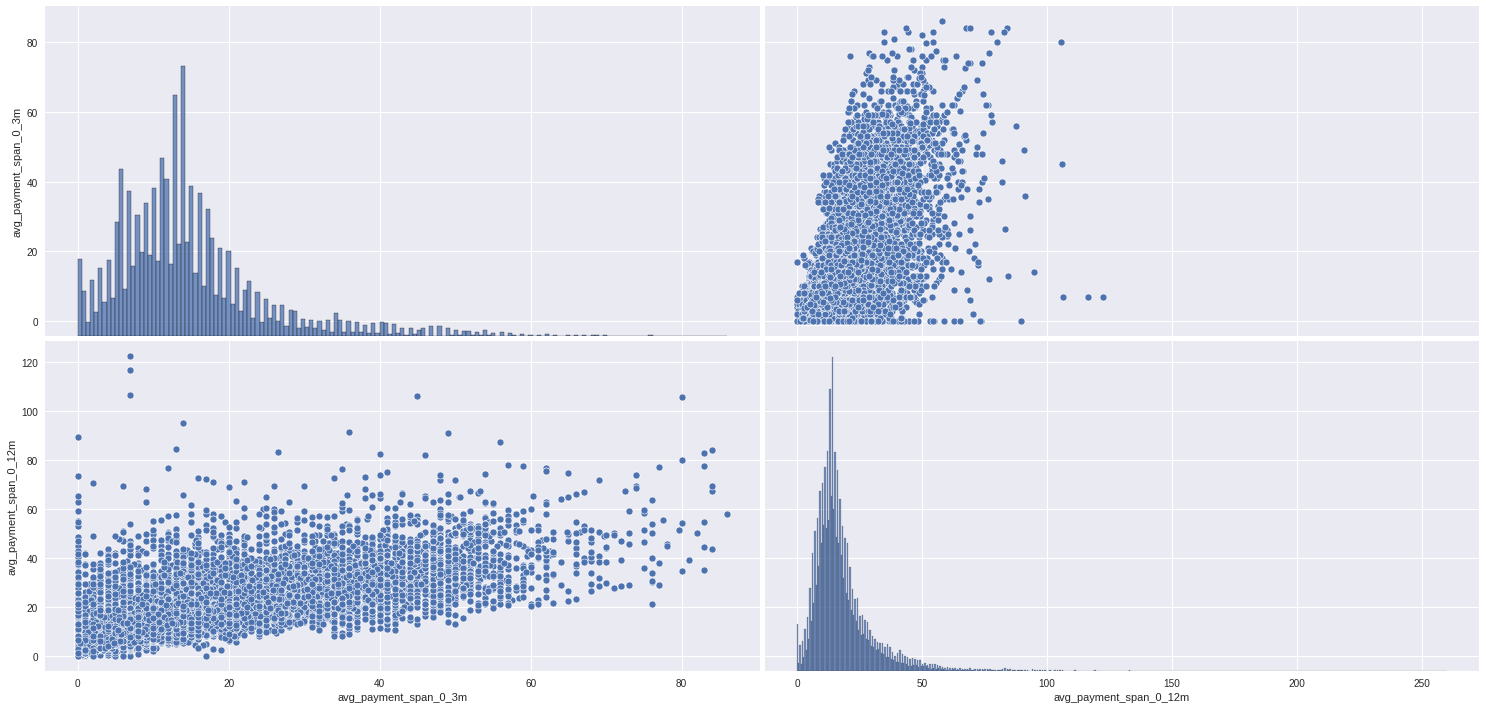

In [27]:
# ax = sns.displot(data=df_train, x="worst_status_active_inv", height=5, aspect=2.1)

sns.pairplot(data=df_train, vars=["avg_payment_span_0_3m", "avg_payment_span_0_12m"], height=5, aspect=2.1)

<AxesSubplot:>

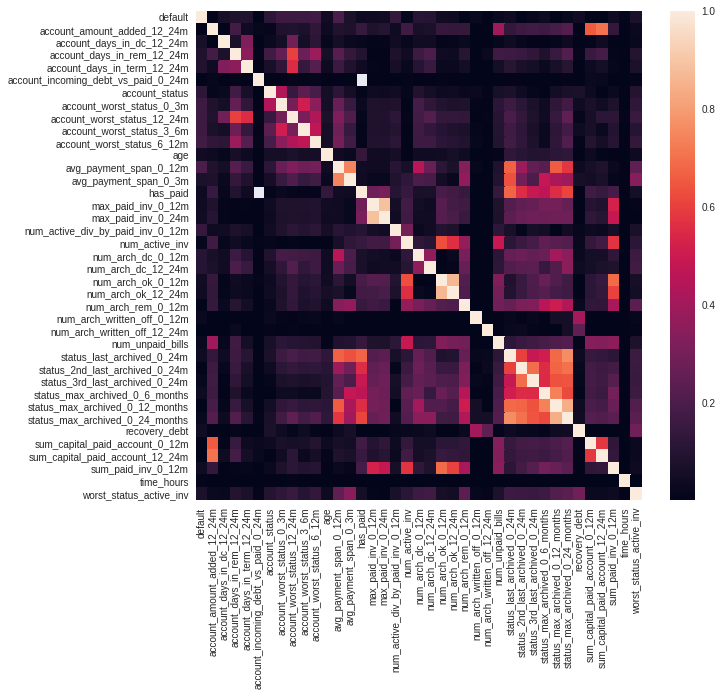

In [28]:
plt.figure(figsize=(10, 9))
sns.heatmap(
    np.abs(corr),
    xticklabels=corr.columns,
    yticklabels=corr.columns,
    vmax=1,
#     annot=True
)

In [29]:
corr = df_train[numerical_features + ["default"]].corr()

np.abs(corr).head(10).default

account_amount_added_12_24m            0.005819
account_days_in_dc_12_24m              0.065545
account_days_in_rem_12_24m             0.085565
account_days_in_term_12_24m            0.086796
account_incoming_debt_vs_paid_0_24m    0.000627
age                                    0.043728
avg_payment_span_0_12m                 0.197384
avg_payment_span_0_3m                  0.073332
max_paid_inv_0_12m                     0.042296
max_paid_inv_0_24m                     0.043468
Name: default, dtype: float64

In [30]:
def remove_collinear_features(x, threshold):
    y = x['default']
    x = x.drop(columns = ['default'])

    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    for i in iters:
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)
            
            if val >= threshold:
                print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])

    drops = set(drop_cols)
    x = x.drop(columns=drops)
    x['default'] = y
               
    return x, drops

In [31]:
x, drops = remove_collinear_features(df_train.copy(), 0.65)

status_last_archived_0_24m | avg_payment_span_0_12m | 0.67
status_last_archived_0_24m | has_paid | 0.67
status_max_archived_0_12_months | avg_payment_span_0_12m | 0.66
status_max_archived_0_12_months | status_last_archived_0_24m | 0.69
status_max_archived_0_12_months | status_2nd_last_archived_0_24m | 0.67
status_max_archived_0_24_months | status_last_archived_0_24m | 0.77
status_max_archived_0_24_months | status_2nd_last_archived_0_24m | 0.7
sum_capital_paid_account_0_12m | account_amount_added_12_24m | 0.66
sum_capital_paid_account_12_24m | account_amount_added_12_24m | 0.71
sum_paid_inv_0_12m | num_arch_ok_0_12m | 0.69


In [32]:
corr[["default"]].T[["sum_paid_inv_0_12m", "num_arch_ok_0_12m"]].abs()

,sum_paid_inv_0_12m,num_arch_ok_0_12m
default,0.035583,0.046578


In [33]:
drops

{'status_last_archived_0_24m',
 'status_max_archived_0_12_months',
 'status_max_archived_0_24_months',
 'sum_capital_paid_account_0_12m',
 'sum_capital_paid_account_12_24m',
 'sum_paid_inv_0_12m'}

In [34]:
collinear_features = [
    "status_last_archived_0_24m",
    "status_max_archived_0_12_months",
    "status_max_archived_0_24_months",
    "sum_capital_paid_account_0_12m",
    "sum_capital_paid_account_12_24m",
    "sum_paid_inv_0_12m"
]

In [ ]:
low_correlation_features = np.abs(corr)["default"].head(6).index.to_list()
low_correlation_features.remove("default")
low_correlation_features